In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
housing = pd.read_csv('data.csv')

In [3]:
housing.head()

,MedInc,HouseAge,CHAS,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3,41,0,5.0,1.0,322,2.6,37.9,-122.2,4.5
1,8.3,21,0,6.2,1.0,2401,2.1,37.9,-122.2,3.6
2,7.3,52,0,8.3,1.1,496,2.8,37.9,-122.2,3.5
3,5.6,52,1,5.8,1.1,558,2.5,37.9,-122.3,3.4
4,3.8,52,1,6.3,1.1,565,2.2,37.9,-122.3,3.4


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       800 non-null    float64
 1   HouseAge     800 non-null    int64  
 2   CHAS         800 non-null    int64  
 3   AveRooms     800 non-null    float64
 4   AveBedrms    800 non-null    float64
 5   Population   800 non-null    int64  
 6   AveOccup     800 non-null    float64
 7   Latitude     800 non-null    float64
 8   Longitude    800 non-null    float64
 9   MedHouseVal  800 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 62.6 KB


In [5]:
housing['CHAS'].value_counts()

CHAS
0    417
1    383
Name: count, dtype: int64

In [6]:
housing.describe()

,MedInc,HouseAge,CHAS,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,3.544000,41.337500,0.478750,5.099250,1.057875,1042.268750,2.648000,37.783125,-122.211250,2.006875
std,1.779508,10.957585,0.499861,1.186374,0.113486,710.101385,0.757967,0.074563,0.078301,0.911443
min,0.500000,2.000000,0.000000,1.700000,0.600000,18.000000,1.400000,37.600000,-122.300000,0.600000
25%,2.400000,35.000000,0.000000,4.300000,1.000000,617.500000,2.200000,37.700000,-122.300000,1.400000
50%,3.100000,43.500000,0.000000,4.900000,1.100000,896.000000,2.600000,37.800000,-122.200000,1.800000
75%,4.300000,52.000000,1.000000,5.800000,1.100000,1237.750000,2.900000,37.800000,-122.200000,2.500000
max,13.500000,52.000000,1.000000,9.200000,2.700000,7427.000000,12.200000,37.900000,-122.000000,5.000000


In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [8]:
housing1 = pd.DataFrame(housing, columns = housing.columns)

In [9]:
housing1

,MedInc,HouseAge,CHAS,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3,41,0,5.0,1.0,322,2.6,37.9,-122.2,4.5
1,8.3,21,0,6.2,1.0,2401,2.1,37.9,-122.2,3.6
2,7.3,52,0,8.3,1.1,496,2.8,37.9,-122.2,3.5
3,5.6,52,1,5.8,1.1,558,2.5,37.9,-122.3,3.4
4,3.8,52,1,6.3,1.1,565,2.2,37.9,-122.3,3.4
...,...,...,...,...,...,...,...,...,...,...
795,3.1,23,1,4.5,1.1,1109,2.7,37.6,-122.1,1.8
796,3.8,31,0,4.1,0.9,548,3.0,37.6,-122.1,1.8
797,4.3,33,1,4.6,0.9,431,2.9,37.6,-122.1,1.9
798,3.9,36,1,4.9,0.8,463,2.9,37.6,-122.1,1.8


## Delaing with Outliers

In [10]:
m = len(housing1.columns)

In [11]:
Outliers = []
threshold = 2
for i in range(m):
    in_outliers = []
    data = housing1.iloc[:,i]
    mean = np.mean(data)
    std = np.std(data)
    data_array = housing1.iloc[:, i].values
    for j in data_array:
        z_score= (j - mean)/std 
        if np.abs(z_score) > threshold:
            in_outliers.append(j)
    Outliers.append(in_outliers)

In [12]:
Outliers

[[8.3,
  8.3,
  7.3,
  7.2,
  7.5,
  7.6,
  11.6,
  7.5,
  8.2,
  8.4,
  8.3,
  8.2,
  8.9,
  7.5,
  7.7,
  7.9,
  8.0,
  8.8,
  7.2,
  10.1,
  7.3,
  7.8,
  7.5,
  7.9,
  9.4,
  7.9,
  11.9,
  13.5,
  12.2,
  8.2,
  12.4,
  8.1,
  8.7,
  7.6,
  7.3,
  7.9],
 [2,
  17,
  19,
  17,
  10,
  10,
  16,
  18,
  19,
  15,
  10,
  14,
  13,
  18,
  5,
  12,
  5,
  15,
  5,
  10,
  18,
  18,
  19,
  17,
  17,
  16,
  5,
  17,
  19,
  19,
  10,
  6,
  5,
  10,
  10,
  18,
  17,
  18,
  19,
  18,
  8],
 [],
 [8.3,
  2.7,
  2.0,
  7.7,
  1.7,
  2.5,
  2.3,
  2.7,
  2.7,
  2.7,
  2.4,
  2.3,
  7.6,
  8.3,
  7.5,
  7.5,
  7.7,
  9.0,
  7.6,
  8.0,
  7.6,
  7.5,
  8.3,
  8.3,
  8.3,
  7.6,
  7.6,
  8.1,
  8.3,
  8.2,
  2.5,
  2.4,
  7.8,
  7.5,
  8.3,
  7.9,
  8.9,
  9.2,
  8.3,
  9.1,
  7.7,
  7.8,
  9.0,
  8.1,
  7.5,
  8.5],
 [1.4,
  0.8,
  1.3,
  1.6,
  1.5,
  1.4,
  1.7,
  1.3,
  1.3,
  0.6,
  1.3,
  0.7,
  1.3,
  0.8,
  0.8,
  1.3,
  0.7,
  1.5,
  1.3,
  1.3,
  1.3,
  1.8,
  1.3,
  1.3,
  1.3,

In [13]:
# Create a list to store the modified rows
housing1_modified_rows = []

# Iterate through each row of the original dataset h2
for i, row in enumerate(housing1.values):
    # Check if the current row index is not in the list of outlier indices
    if i not in [index for sublist in Outliers for index in sublist]:
        housing1_modified_rows.append(row)

# Create the modified dataset h2_modified
housing1_modified = pd.DataFrame(housing1_modified_rows, columns=housing1.columns)

In [14]:
housing1_modified

,MedInc,HouseAge,CHAS,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3,41.0,0.0,5.0,1.0,322.0,2.6,37.9,-122.2,4.5
1,8.3,21.0,0.0,6.2,1.0,2401.0,2.1,37.9,-122.2,3.6
2,5.6,52.0,1.0,5.8,1.1,558.0,2.5,37.9,-122.3,3.4
3,3.1,52.0,1.0,4.8,1.1,1157.0,1.8,37.8,-122.3,2.4
4,3.3,52.0,1.0,4.8,1.0,1504.0,2.0,37.9,-122.3,2.4
...,...,...,...,...,...,...,...,...,...,...
780,3.1,23.0,1.0,4.5,1.1,1109.0,2.7,37.6,-122.1,1.8
781,3.8,31.0,0.0,4.1,0.9,548.0,3.0,37.6,-122.1,1.8
782,4.3,33.0,1.0,4.6,0.9,431.0,2.9,37.6,-122.1,1.9
783,3.9,36.0,1.0,4.9,0.8,463.0,2.9,37.6,-122.1,1.8


## Train-Test Split
In our dataset, we have a binary variable named 'CHAS'. Due to this, we'll have to apply the technique of Stratified Shuffle Split to get the same ratio of categories of 'CHAS' in train and test set.

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
sp = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in sp.split(housing1_modified, housing1_modified['CHAS']):
    housing_train = housing1_modified.loc[train_index]
    housing_test = housing1_modified.loc[test_index]

In [16]:
housing_train['CHAS'].value_counts()

CHAS
0.0    326
1.0    302
Name: count, dtype: int64

In [17]:
housing_test['CHAS'].value_counts()

CHAS
0.0    82
1.0    75
Name: count, dtype: int64

In [18]:
housing_train

,MedInc,HouseAge,CHAS,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
437,2.5,37.0,1.0,4.3,1.1,1152.0,1.9,37.9,-122.3,2.8
646,4.6,17.0,0.0,4.4,0.9,695.0,2.1,37.7,-122.1,1.9
51,0.8,48.0,1.0,4.4,1.1,788.0,2.4,37.8,-122.3,0.8
538,3.0,52.0,0.0,5.1,1.1,915.0,2.2,37.8,-122.3,2.3
397,4.6,52.0,1.0,6.3,1.1,835.0,2.3,37.9,-122.3,2.9
...,...,...,...,...,...,...,...,...,...,...
452,2.3,52.0,1.0,4.2,1.0,571.0,2.0,37.9,-122.3,1.8
207,5.0,43.0,0.0,6.7,1.1,1115.0,2.5,37.8,-122.2,2.7
260,7.1,41.0,0.0,6.6,1.1,626.0,2.9,37.8,-122.2,2.4
310,2.5,43.0,0.0,4.6,0.9,417.0,2.7,37.7,-122.2,0.8


In [19]:
corr_matrix = housing_train.corr()
corr_matrix['MedHouseVal'].sort_values(ascending = False)

MedHouseVal    1.000000
MedInc         0.749544
AveRooms       0.532050
Latitude       0.191768
Population     0.044218
CHAS           0.020974
Longitude      0.018461
HouseAge      -0.002508
AveBedrms     -0.171050
AveOccup      -0.220331
Name: MedHouseVal, dtype: float64

array([[<Axes: xlabel='MedHouseVal', ylabel='MedHouseVal'>,
        <Axes: xlabel='MedInc', ylabel='MedHouseVal'>,
        <Axes: xlabel='AveRooms', ylabel='MedHouseVal'>],
       [<Axes: xlabel='MedHouseVal', ylabel='MedInc'>,
        <Axes: xlabel='MedInc', ylabel='MedInc'>,
        <Axes: xlabel='AveRooms', ylabel='MedInc'>],
       [<Axes: xlabel='MedHouseVal', ylabel='AveRooms'>,
        <Axes: xlabel='MedInc', ylabel='AveRooms'>,
        <Axes: xlabel='AveRooms', ylabel='AveRooms'>]], dtype=object)

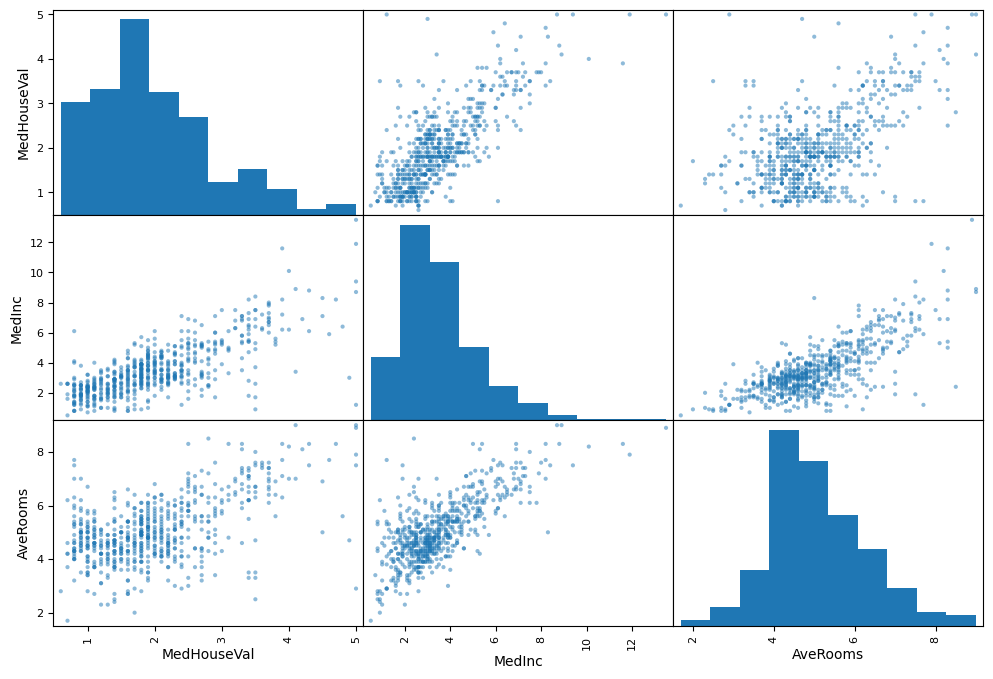

In [20]:
from pandas.plotting import scatter_matrix
attributes = ['MedHouseVal', 'MedInc', 'AveRooms']
scatter_matrix(housing_train[attributes], figsize = (12,8))

<Axes: xlabel='MedInc', ylabel='MedHouseVal'>

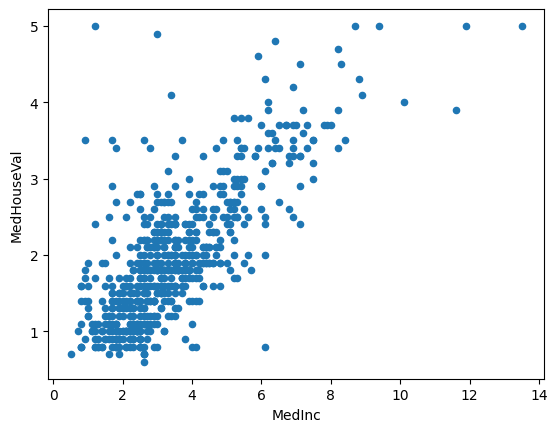

In [21]:
housing_train.plot(kind = "scatter", x = 'MedInc', y = 'MedHouseVal')

In [22]:
housing_train

,MedInc,HouseAge,CHAS,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
437,2.5,37.0,1.0,4.3,1.1,1152.0,1.9,37.9,-122.3,2.8
646,4.6,17.0,0.0,4.4,0.9,695.0,2.1,37.7,-122.1,1.9
51,0.8,48.0,1.0,4.4,1.1,788.0,2.4,37.8,-122.3,0.8
538,3.0,52.0,0.0,5.1,1.1,915.0,2.2,37.8,-122.3,2.3
397,4.6,52.0,1.0,6.3,1.1,835.0,2.3,37.9,-122.3,2.9
...,...,...,...,...,...,...,...,...,...,...
452,2.3,52.0,1.0,4.2,1.0,571.0,2.0,37.9,-122.3,1.8
207,5.0,43.0,0.0,6.7,1.1,1115.0,2.5,37.8,-122.2,2.7
260,7.1,41.0,0.0,6.6,1.1,626.0,2.9,37.8,-122.2,2.4
310,2.5,43.0,0.0,4.6,0.9,417.0,2.7,37.7,-122.2,0.8


In [23]:
corr_matrix = housing_train.corr()
corr_matrix['MedHouseVal'].sort_values(ascending = False)

MedHouseVal    1.000000
MedInc         0.749544
AveRooms       0.532050
Latitude       0.191768
Population     0.044218
CHAS           0.020974
Longitude      0.018461
HouseAge      -0.002508
AveBedrms     -0.171050
AveOccup      -0.220331
Name: MedHouseVal, dtype: float64

In [24]:
housing_train_features = housing_train.drop("MedHouseVal", axis = 1)
housing_train_label = housing_train["MedHouseVal"].copy()

## Selecting the Desired Model for Muzammil Real Estate Developers

In [25]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(housing_train_features, housing_train_label)

RandomForestRegressor()

In [26]:
predictions = model.predict(housing_test.drop(['MedHouseVal'],axis=1))


In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(predictions,housing_test['MedHouseVal'])
mse = mean_squared_error(predictions,housing_test['MedHouseVal'])
rmse = np.sqrt(mse)

In [28]:
mae, rmse

(0.30775796178343956, 0.4769188129442238)

## Correlation Coefficient of Model

In [29]:
correlation_coefficient = np.corrcoef(predictions, housing_test['MedHouseVal'])[0, 1]

In [30]:
correlation_coefficient

0.8965369257772493